## BME i9400
## Fall 2024
### Neural Networks in PyTorch


## Classes and objects in Python
- An ```object``` is a structure that contains both data (variables) and functions (methods)
- A ```class``` is a blueprint for creating objects
- Classes are used to organize programs and make them more modular

## Example: Medical record class
- We will create a class to represent a patient's medical record
- The class will have the following attributes:
    - Name
    - Age
    - Height
    - Weight
    - BMI
- The class will have the following methods:
    - ```calculate_bmi```: calculates the BMI of the patient
    - ```print_record```: prints the patient's record
    - ```update_weight```: updates the patient's weight
    - ```update_height```: updates the patient's height
    - ```update_age```: updates the patient's age
    - ```update_name```: updates the patient's name
    - ```update_record```: updates the patient's record

In [1]:
from numpy.distutils.system_info import x11_info


class Address:
    def __init__(self, street, city, state, zip_code):
        self.street = street
        self.city = city
        self.state = state
        self.zip_code = zip_code

    def print_address(self):
        print(f'Street: {self.street}')
        print(f'City: {self.city}')
        print(f'State: {self.state}')
        print(f'Zip Code: {self.zip_code}')

class MedicalRecord: # medical_record is non-camel notation
    def __init__(self, name, age, height, weight, address):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight
        self.bmi = self.calculate_bmi()
        self.address = address
        
    def calculate_bmi(self):
        return self.weight / (self.height**2)

    def print_record(self):
        print(f'Name: {self.name}')
        print(f'Age: {self.age}')
        print(f'Height: {self.height}')
        print(f'Weight: {self.weight}')
        print(f'BMI: {self.bmi}')
        self.address.print_address()

    def update_weight(self, weight):
        self.weight = weight
        self.bmi = self.calculate_bmi()

    def update_height(self, height):
        self.height = height
        self.bmi = self.calculate_bmi()

    def update_age(self, age):
        self.age = age

    def update_name(self, name):
        self.name = name

    def update_record(self, name, age, height, weight):
        self.name = name
        self.age = age
        self.height = height
        self.weight = weight
        self.bmi = self.calculate_bmi()
        
    def update_address(self, street, city, state, zip_code):
        self.address.street = street
        self.address.city = city
        self.address.state = state
        self.address.zip_code = zip_code

/var/folders/fd/ll8tk31d5kxgzdh7qt8w6q8w0000gn/T/ipykernel_2634/1471338438.py:1: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  from numpy.distutils.system_info import x11_info


## Creating an object of the MedicalRecord class

In [2]:
patient_address = Address('123 Main St.', 'New York', 'NY', '10001') # create an instance of Address
patient = MedicalRecord('Jacek', 29, 1.77, 73, patient_address ) # create an instance of MedicalRecord
# patient is an instance of the MedicalRecord class (an object)

## Obtaining *attributes* of a class

In [3]:
print(patient.name)
print(patient.age)
patient.address.print_address()

Jacek
29
Street: 123 Main St.
City: New York
State: NY
Zip Code: 10001


## Calling *methods* of a class

In [19]:
patient.print_record()

Name: Jacek
Age: 29
Height: 1.77
Weight: 73
BMI: 23.301094832264035
Street: 123 Main St.
City: New York
State: NY
Zip Code: 10001


## From theory to practice
- We have seen the theory of multilayer perceptrons (MLPs) in the previous lecture
- We now turn to the practical aspects of implementing MLPs in PyTorch
- We will begin by implementing logistic regression in PyTorch

## Library imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Generating a synthetic dataset
- We will make use of scikit-learn's ```make_classification``` function to generate a simple binary classification dataset
- We will split the dataset into training and validation sets
- We will then convert the NumPy arrays to PyTorch tensors

In [36]:
# generate features and labels
X, y = make_classification(n_samples=10000, n_features=50, n_informative=5, n_redundant=0, random_state=42)

# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# convert features and labels into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

(torch.Size([8000, 50]),
 torch.Size([8000]),
 torch.Size([2000, 50]),
 torch.Size([2000]))

## Logistic regression in PyTorch
- A neural network in PyTorch is an instance of the ```nn.Module``` class
- Each neural network consists of a series of *layers*
- In our simple case, we will use a single layer for logistic regression
- Each nn.Module subclass must implement a ```forward``` method that defines the forward pass of the network
- Remember that ``forward pass'' means computing the output of the network given the input

In [3]:
my_linear_block = nn.Linear(5, 3)
my_second_linear_block = nn.Linear(3, 1)

# create a random tensor of 5 elements
x = torch.randn(5)

# pass the tensor through the linear block
y = my_linear_block(x)
z = my_second_linear_block(y)

print("x", x)
print("y", y)
print("z", z)

x tensor([-0.7172, -0.6050, -0.0801, -0.5211, -1.5329])
y tensor([ 0.7824, -0.3023, -0.7245], grad_fn=<ViewBackward0>)
z tensor([0.6569], grad_fn=<ViewBackward0>)


In [4]:
# y = Wx + b (W: weight matrix, b: bias vector)

In [5]:
my_linear_block.weight, my_linear_block.bias

(Parameter containing:
 tensor([[-0.3502,  0.0911,  0.0267, -0.1784, -0.3567],
         [-0.2245, -0.2281,  0.0855,  0.2696,  0.0455],
         [ 0.0065, -0.1640,  0.2623, -0.2389,  0.3890]], requires_grad=True),
 Parameter containing:
 tensor([-0.0513, -0.3842, -0.3263], requires_grad=True))

In [37]:
# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size): # input_size: number of features, output_size: number of classes
        super(LogisticRegressionModel, self).__init__()
        
        # Single layer for logistic regression
        self.linear = nn.Linear(input_size, output_size) # "linear" is the *name* of our layer
        self.softmax = nn.Softmax(dim=1)  # Softmax activation function to convert outputs to probabilities

    def forward(self, x): # implements the forward pass
        return self.softmax(self.linear(x))

## Creating an instance of the model
- So far we have defined a class, which is a blueprint for the model
- To actually create a model that we can work with, we need to *instantiate* the class
- Instantiating a class means creating an *object* of that class

In [40]:
# Number of features
input_size = X_train.shape[1]
print(f"The number of features is {input_size}")

# Number of classes
output_size = 2  # Binary classification
print(f"The number of classes is {output_size}")

print("Now creating model...")
model = LogisticRegressionModel(input_size, output_size)
print("Model created.")

The number of features is 50
The number of classes is 2
Now creating model...
Model created.


## Inspecting the model
- The model object provides a convenient way to access the layers and parameters of the model
- Let's take a look at the weights and biases of the model

In [41]:
model.linear.weight

Parameter containing:
tensor([[ 0.0879,  0.0508,  0.0985,  0.0662,  0.1055, -0.0887,  0.0794, -0.0403,
         -0.0117, -0.0565,  0.0405, -0.0024, -0.1264,  0.0983,  0.0860, -0.0514,
          0.0462,  0.0588,  0.0087, -0.0756,  0.0532, -0.0193, -0.1364, -0.0958,
          0.0557,  0.0315,  0.1041, -0.0313,  0.0164,  0.0916, -0.1101,  0.0252,
          0.0274, -0.0025, -0.1339,  0.0169, -0.0894,  0.0179,  0.0156, -0.0924,
          0.0334, -0.0667,  0.0488,  0.0324, -0.0386, -0.1048, -0.0550,  0.1120,
          0.0422,  0.0882],
        [-0.0076,  0.1303,  0.0632, -0.1282, -0.0014, -0.0281, -0.0903,  0.0260,
          0.0672, -0.0780, -0.0336,  0.0372, -0.1154, -0.0998,  0.0315, -0.0182,
          0.0537, -0.0940,  0.0158,  0.1361, -0.0546, -0.1182, -0.0054, -0.0188,
          0.0150, -0.0564,  0.1295,  0.1362,  0.0269, -0.1276,  0.1147,  0.1192,
         -0.0112,  0.1063, -0.0137,  0.0727, -0.0583, -0.0364, -0.0174, -0.0074,
          0.0842,  0.0555,  0.0990,  0.1388,  0.0951, -0.07

In [42]:
model.linear.bias

Parameter containing:
tensor([-0.0002, -0.0215], requires_grad=True)

### output = softmax(  model.linear.weight * input + model.linear.bias )

### Q1: Why are there two rows in the weight matrix?
### Q2: Why are there two columns in the weight matrix?
### Q3: Where did the weights and biases come from?

## Evaluating the (untrained) model on random inputs
- Before training the model, let's see what the model predicts on random inputs
- This will help us to understand how the forward pass works in PyTorch

In [43]:
# Random input
x = torch.randn(1, input_size)

# Forward pass
output1 = model(x)
output2 = model.forward(x)

print(f"input: {x}")
print(f"output: {output1}")
print(f"output: {output2}")

input: tensor([[ 0.4030, -0.3536, -1.8120,  1.4469, -1.0518, -0.2141, -0.2104,  0.0841,
         -0.3992, -1.4182,  0.1195, -0.3839,  0.4040,  1.2041, -0.3754,  1.3666,
          1.5386,  0.7277, -0.2854, -0.4748,  0.3696, -0.8776, -1.1102,  0.6735,
          0.5964, -0.1601,  0.7012,  1.2989, -0.0540, -1.1074, -1.2232,  0.5936,
          0.6685, -2.0412,  0.9688,  1.2765,  0.1177,  0.4753, -0.5763, -0.4539,
         -0.3154,  1.2582,  0.8262,  0.7063,  1.5343, -1.2153,  1.0596,  1.1167,
         -1.0032, -1.9738]])
output: tensor([[0.4672, 0.5328]], grad_fn=<SoftmaxBackward0>)
output: tensor([[0.4672, 0.5328]], grad_fn=<SoftmaxBackward0>)


## Evaluating model on a batch of inputs
- A *batch* refers to a set of examples that is used to compute the gradient of the loss function during training
- A typical batch size is 32, 64, or 128 examples
- An *epoch* refers to a complete pass through the dataset, such that each examples has appeared in a batch once

In [44]:
# Random batch of inputs
X_batch = torch.randn(5, input_size)

# Forward pass
output = model(X_batch)
output

tensor([[0.5472, 0.4528],
        [0.5633, 0.4367],
        [0.3979, 0.6021],
        [0.3983, 0.6017],
        [0.1969, 0.8031]], grad_fn=<SoftmaxBackward0>)

## Defining the loss function and optimizer
- PyTorch provides a wide range of loss functions and optimizers
- For logistic regression, we will use the cross-entropy loss and stochastic gradient descent (SGD) optimizer
- An important parameter for the optimizer is the *learning rate*, which controls the size of the updates to the weights

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) # learning rate = 0.01

## Training the model
- We are now ready to run our stochastic gradient descent (SGD) algorithm to train the model
- For simplicity, we will use all of the data in a single batch (batch size = 100 = number of training examples)
- We will train over 100 epochs
- At each epoch, we will compute the loss, compute the gradients, and update the weights

In [46]:
# Train the logistic regression model
epochs = 30000
losses = []

for epoch in range(epochs):
    
    ## Forward pass
    
    # Compute the predicted outputs
    outputs = model.forward(X_train)
    
    # Compute the loss function using the current predictions
    loss = criterion(outputs, y_train)
    losses.append(loss.item())

    ## Backward pass

    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad() # zero them from the previous iteration
    loss.backward() # compute the gradients!
    optimizer.step() # update the weights!

    # Print loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/30000], Loss: 0.7249
Epoch [40/30000], Loss: 0.7041
Epoch [60/30000], Loss: 0.6855
Epoch [80/30000], Loss: 0.6695
Epoch [100/30000], Loss: 0.6558
Epoch [120/30000], Loss: 0.6443
Epoch [140/30000], Loss: 0.6344
Epoch [160/30000], Loss: 0.6259
Epoch [180/30000], Loss: 0.6186
Epoch [200/30000], Loss: 0.6121
Epoch [220/30000], Loss: 0.6065
Epoch [240/30000], Loss: 0.6015
Epoch [260/30000], Loss: 0.5970
Epoch [280/30000], Loss: 0.5930
Epoch [300/30000], Loss: 0.5893
Epoch [320/30000], Loss: 0.5860
Epoch [340/30000], Loss: 0.5830
Epoch [360/30000], Loss: 0.5803
Epoch [380/30000], Loss: 0.5777
Epoch [400/30000], Loss: 0.5754
Epoch [420/30000], Loss: 0.5732
Epoch [440/30000], Loss: 0.5712
Epoch [460/30000], Loss: 0.5693
Epoch [480/30000], Loss: 0.5676
Epoch [500/30000], Loss: 0.5660
Epoch [520/30000], Loss: 0.5644
Epoch [540/30000], Loss: 0.5630
Epoch [560/30000], Loss: 0.5617
Epoch [580/30000], Loss: 0.5604
Epoch [600/30000], Loss: 0.5592
Epoch [620/30000], Loss: 0.5581
Epoch [640/3

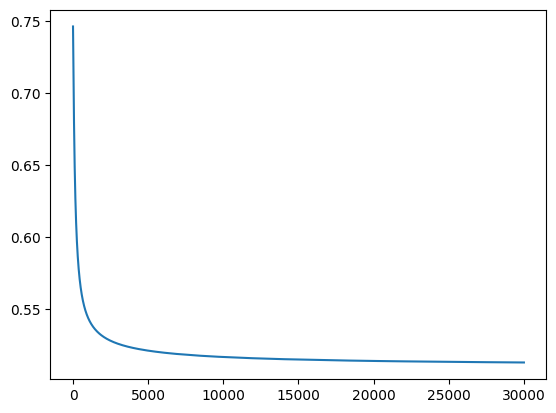

In [47]:
import matplotlib.pyplot as plt
plt.plot(losses)

## Evaluating the trained model
- We can now evaluate the trained model on the validation set

In [48]:
# Compute the predicted outputs
outputs = model(X_val)
outputs

tensor([[0.0061, 0.9939],
        [0.9766, 0.0234],
        [0.0020, 0.9980],
        ...,
        [0.0134, 0.9866],
        [0.1292, 0.8708],
        [0.1105, 0.8895]], grad_fn=<SoftmaxBackward0>)

In [49]:
import numpy as np
#compute the estimated probabilities of the positive class
py_hat_val = outputs[:,1]

# convert the probabilities to numpy format
py_hat_val = py_hat_val.detach().numpy()

# measure the area under the ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, py_hat_val)

np.float64(0.8300646926797651)

### How did we do relative to random guessing?

## Implementing an MLP with a single hidden layer
- We will now implement a multilayer perceptron (MLP) with a single hidden layer
- For this, we will need to define a new class that inherits from ```nn.Module```

In [50]:
class SingleLayerMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SingleLayerMLP, self).__init__()
        # First layer (input to hidden)
        self.hidden = nn.Linear(input_size, hidden_size)
        # Activation function (ReLU introduces non-linearity)
        self.relu = nn.ReLU()
        # Output layer (hidden to output)
        self.output = nn.Linear(hidden_size, output_size)
        # softmax activation for output layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass input through the first layer, apply ReLU, then pass to output layer and apply softmax
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

## Creating an instance of the single-layer MLP model
- We need to select the number of units in our hidden layer
- Remember that this is called a *hyperparameter* because it is not learned from the data
- We will begin with an arbitrary choice of 5 hidden units

In [51]:
hidden_size = 5  # Choose an arbitrary number of neurons for the hidden layer
model = SingleLayerMLP(input_size, hidden_size, output_size)

## Inspecting the model architecture is good practice

In [52]:
print(model)

SingleLayerMLP(
  (hidden): Linear(in_features=50, out_features=5, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=5, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


## Define the optimizer and loss function (same as before)
- Now we will train our single-layer MLP model using the same cross-entropy loss and stochastic gradient descent optimizer

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [54]:
# Train the single-layer MLP model
epochs = 30000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/30000], Loss: 0.7042
Epoch [40/30000], Loss: 0.7029
Epoch [60/30000], Loss: 0.7017
Epoch [80/30000], Loss: 0.7006
Epoch [100/30000], Loss: 0.6996
Epoch [120/30000], Loss: 0.6987
Epoch [140/30000], Loss: 0.6978
Epoch [160/30000], Loss: 0.6970
Epoch [180/30000], Loss: 0.6962
Epoch [200/30000], Loss: 0.6955
Epoch [220/30000], Loss: 0.6948
Epoch [240/30000], Loss: 0.6942
Epoch [260/30000], Loss: 0.6936
Epoch [280/30000], Loss: 0.6930
Epoch [300/30000], Loss: 0.6924
Epoch [320/30000], Loss: 0.6918
Epoch [340/30000], Loss: 0.6913
Epoch [360/30000], Loss: 0.6907
Epoch [380/30000], Loss: 0.6902
Epoch [400/30000], Loss: 0.6896
Epoch [420/30000], Loss: 0.6891
Epoch [440/30000], Loss: 0.6885
Epoch [460/30000], Loss: 0.6880
Epoch [480/30000], Loss: 0.6874
Epoch [500/30000], Loss: 0.6868
Epoch [520/30000], Loss: 0.6862
Epoch [540/30000], Loss: 0.6856
Epoch [560/30000], Loss: 0.6850
Epoch [580/30000], Loss: 0.6843
Epoch [600/30000], Loss: 0.6836
Epoch [620/30000], Loss: 0.6829
Epoch [640/3

## Evaluating the trained model

In [55]:
# Compute the predicted outputs
outputs = model(X_val)

# compute the estimated probabilities of the positive class
py_hat_val = outputs[:,1]

# convert the probabilities to numpy format
py_hat_val = py_hat_val.detach().numpy()

roc_auc_score(y_val, py_hat_val)

np.float64(0.9659998359678498)

### How did we do relative to logistic regression?

## Creating an MLP with an arbitrary number of hidden layers
- PyTorch makes it easy to create MLPs with an arbitrary number of hidden layers
- We will create another class inheriting from ```nn.Module``` that allows us to specify the number of hidden layers
- In the code below, the list ```hidden_sizes``` contains the number of neurons in each hidden layer
- The number of elements in this list defines the number of hidden layers

In [56]:
class MultiLayerMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MultiLayerMLP, self).__init__()
        # Define the layers sequentially
        layers = []
        in_size = input_size
        for h in hidden_sizes: # hidden_sizes 
            # Add a hidden layer with ReLU activation
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        # Add the final output layer
        layers.append(nn.Linear(in_size, output_size))
        # Combine layers into a sequential model
        self.model = nn.Sequential(*layers)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        return self.softmax(self.model(x))

## Creating an instance of the multi-layer MLP model

In [61]:
hidden_sizes = [100, 50]  # Two hidden layers with 10 and 5 neurons, respectively
model = MultiLayerMLP(input_size, hidden_sizes, output_size)
print(model)

MultiLayerMLP(
  (model): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
  (softmax): Softmax(dim=1)
)


## Training the model (same as before)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [64]:
epochs = 3000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/3000], Loss: 0.6523
Epoch [40/3000], Loss: 0.6498
Epoch [60/3000], Loss: 0.6471
Epoch [80/3000], Loss: 0.6444
Epoch [100/3000], Loss: 0.6416
Epoch [120/3000], Loss: 0.6387
Epoch [140/3000], Loss: 0.6357
Epoch [160/3000], Loss: 0.6327
Epoch [180/3000], Loss: 0.6296
Epoch [200/3000], Loss: 0.6264
Epoch [220/3000], Loss: 0.6232
Epoch [240/3000], Loss: 0.6200
Epoch [260/3000], Loss: 0.6167
Epoch [280/3000], Loss: 0.6135
Epoch [300/3000], Loss: 0.6102
Epoch [320/3000], Loss: 0.6070
Epoch [340/3000], Loss: 0.6038
Epoch [360/3000], Loss: 0.6006
Epoch [380/3000], Loss: 0.5974
Epoch [400/3000], Loss: 0.5944
Epoch [420/3000], Loss: 0.5913
Epoch [440/3000], Loss: 0.5884
Epoch [460/3000], Loss: 0.5854
Epoch [480/3000], Loss: 0.5826
Epoch [500/3000], Loss: 0.5798
Epoch [520/3000], Loss: 0.5772
Epoch [540/3000], Loss: 0.5746
Epoch [560/3000], Loss: 0.5720
Epoch [580/3000], Loss: 0.5696
Epoch [600/3000], Loss: 0.5672
Epoch [620/3000], Loss: 0.5649
Epoch [640/3000], Loss: 0.5627
Epoch [660/3

## Evaluating the trained model

In [65]:
# Compute the predicted outputs
outputs = model(X_val)

# compute the estimated probabilities of the positive class
py_hat_val = outputs[:,1]

# convert the probabilities to numpy format
py_hat_val = py_hat_val.detach().numpy()

roc_auc_score(y_val, py_hat_val)

np.float64(0.9112716092354101)